<div>
    <h1><b>Iris flower classification with accuracy 0.95</b></h1>
    <br/>
    <b>
    <p>join us in the telegram channel <a href = "https://t.me/elmedade">@elmedade</a></p>
    <p>We used from <a href = "https://kaggle.com">kaggle.com</a> as main source of this project</p>
    </b>
</div>

# What is classification?
Classification is a type of supervised machine learning task where the goal is to predict the class or category of a given input data point. In classification, we have a set of labeled data points, where each data point is associated with a class or category. The task is to build a model that can learn from this labeled data and then classify new, unseen data points into one of the predefined classes.

For example, in email spam detection, we can have a dataset of emails labeled as either "spam" or "not spam". The classification model is trained on this labeled data to learn patterns and features that distinguish spam emails from non-spam emails. Once trained, the model can then classify new, unseen emails as either spam or not spam based on the learned patterns.

Classification algorithms can be implemented using various machine learning packages such as scikit-learn in Python.

# Somethings about Iris dataset
The Iris dataset is a popular dataset in machine learning and statistics. It is often used as a beginner's dataset for learning classification algorithms. The dataset consists of measurements of four features (sepal length, sepal width, petal length, and petal width) of three different species of Iris flowers (setosa, versicolor, and virginica). Each species has 50 samples, resulting in a total of 150 samples in the dataset. The goal is to classify the species of an Iris flower based on its measurements.

# Iris classification problem

In [16]:
# import nessessory libraries on the project
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
# read dataset with pandas
df = pd.read_csv("Iris.csv")

In [197]:
df.drop('Id',axis=1,inplace=True)

In [198]:
# show five rows from dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [199]:
# some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 6.0 KB


In [200]:
# discription of dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [201]:
# how many data from any type of irsis we have on dataset? number of rows
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [202]:
# finding the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

so we don't have any null value on the dataset
null value should fill with some special value. e.g. we can fill that with mean or median of data with common feature.

# Making Neural Network

## What is neural network?
A neural network is a computational model inspired by the structure and functioning of the human brain. It is a collection of interconnected nodes, called neurons, organized in layers. Each neuron receives input signals, performs a computation, and produces an output signal. The output of one neuron can serve as input to other neurons, allowing information to flow through the network.

Neural networks are commonly used for tasks such as pattern recognition, classification, regression, and optimization. They are particularly effective in handling complex and non-linear relationships in data. The strength of a neural network lies in its ability to learn from data through a process called training. During training, the network adjusts the weights and biases of its neurons to minimize the difference between its predicted outputs and the desired outputs.

Neural networks have gained popularity in recent years due to advancements in computational power and the availability of large datasets. They have been successfully applied in various domains, including image and speech recognition, natural language processing, and autonomous driving.

In [203]:
# input and output variable
# Undependant and dependent variable
X = df.drop('Species', axis = 1)
y = df['Species']

In [204]:
# importting libraries that we need to create a neural network model
# in this project we used from keras ab based platform
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [205]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes

The `pandas.Categorical` method in the pandas library is used to create a categorical variable or column in a DataFrame. Categorical variables are variables that can take on a limited and fixed set of values, often referred to as categories or levels. 

The `pandas.Categorical` method takes an array-like object (such as a list or a Series) as input and returns a new Categorical object. This object represents the categorical variable and contains the original values along with the categories and codes associated with each value.

By converting a column to a categorical variable, you can achieve several benefits. Categorical variables can save memory by storing the values as integers rather than strings. They can also provide a more efficient representation for certain operations, such as grouping and aggregating data.


In [206]:
# an example of how to use the 'pandas.Categorical' method:
# Create a list of values
data = ['A', 'B', 'A', 'C', 'B']

# Convert the list to a categorical variable
categorical_data = pd.Categorical(data)

# Print the categorical variable
print(categorical_data)

['A', 'B', 'A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']


In [207]:
# .code covert the categorical values to a numerical values
# A=>0, B=>1, C=>3
categorical_data.codes

array([0, 1, 0, 2, 1], dtype=int8)

In [208]:
# replace the numerical values with categurical values in the dependant variable y
y = to_categorical(df.Species)

In [209]:
# for training the model we need to splitting data to the train and test categuries
# we used from sklearn for do that
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [210]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
119,6.0,2.2,5.0,1.5
43,5.0,3.5,1.6,0.6
99,5.7,2.8,4.1,1.3
...,...,...,...,...
137,6.4,3.1,5.5,1.8
79,5.7,2.6,3.5,1.0
133,6.3,2.8,5.1,1.5
94,5.6,2.7,4.2,1.3


In [211]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (4, )))
model.add(Dense(3, activation = 'softmax'))

### *Sequential model in deep learning*
In the context of deep learning, a sequential model refers to a type of neural network model that is composed of a linear stack of layers. It is called "sequential" because the layers are arranged sequentially, with one layer following another.

The sequential model is a popular and straightforward way to build deep learning models using frameworks like Keras or TensorFlow. In a sequential model, you can add layers one by one, specifying the type of layer and its configuration. Each layer in the model takes the output of the previous layer as its input.

Sequential models are commonly used for tasks such as image classification, text classification, and sequence prediction. They are well-suited for scenarios where the data flows in a sequential manner, such as in natural language processing or time series analysis.

### *activation functions in this markdown*
$$relu: f(x)= \begin{cases}x & x>0 \\ 0 & x<0\end{cases}$$
$$ Softmax: f_i(\vec{a})=\frac{e^{a_i}}{\sum_k e^{a_k}}$$

In [247]:
# compiling model on kernel
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs = 45, validation_data = (X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 57ms/step - loss: 0.1750 - accuracy: 0.9524 - val_loss: 0.1758 - val_accuracy: 0.9556
Epoch 2/45
4/4 [==============================] - 0s 10ms/step - loss: 0.1811 - accuracy: 0.9619 - val_loss: 0.1896 - val_accuracy: 0.9333
Epoch 3/45
4/4 [==============================] - 0s 11ms/step - loss: 0.1746 - accuracy: 0.9714 - val_loss: 0.1688 - val_accuracy: 0.9778
Epoch 4/45
4/4 [==============================] - 0s 10ms/step - loss: 0.1633 - accuracy: 0.9714 - val_loss: 0.1595 - val_accuracy: 0.9778
Epoch 5/45
4/4 [==============================] - 0s 10ms/step - loss: 0.1688 - accuracy: 0.9619 - val_loss: 0.1567 - val_accuracy: 1.0000
Epoch 6/45
4/4 [==============================] - 0s 11ms/step - loss: 0.1599 - accuracy: 0.9810 - val_loss: 0.1615 - val_accuracy: 0.9778
Epoch 7/45
4/4 [==============================] - 0s 11ms/step - loss: 0.1594 - accuracy: 0.9714 - val_loss: 0.1675 - val_accuracy: 0.9556
Epoch 8/45
4/4 [===========

In [215]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.9556


[0.32511064410209656, 0.9555555582046509]

In [246]:
# predicting result for test data (10 data)
pred = model.predict(X_test[:10])
pred

1/1 [==============================] - 0s 17ms/step


array([[9.9075079e-01, 9.2461538e-03, 3.1178431e-06],
       [2.2628978e-03, 7.0370674e-01, 2.9403043e-01],
       [9.9814928e-01, 1.8505764e-03, 1.4394726e-07],
       [3.1792719e-03, 7.5869918e-01, 2.3812144e-01],
       [9.9298882e-01, 7.0096133e-03, 1.6842999e-06],
       [9.9415100e-01, 5.8474033e-03, 1.5848216e-06],
       [5.0604763e-03, 7.5018185e-01, 2.4475753e-01],
       [1.2944849e-02, 8.8333428e-01, 1.0372091e-01],
       [3.0324592e-05, 1.4994769e-01, 8.5002190e-01],
       [9.5603186e-01, 4.3900035e-02, 6.7994559e-05]], dtype=float32)

In [244]:
# predicted values for test data
# it is categurical values
# there is equalent variable with categurical values A=>0, B=>1, C=>3
p = np.argmax(pred, axis = 1)
print(p)

[0 1 0 1 0 0 1 1 2 0]


In [241]:
# accuracy of the model on each epoch saved in history
accuracy_history = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

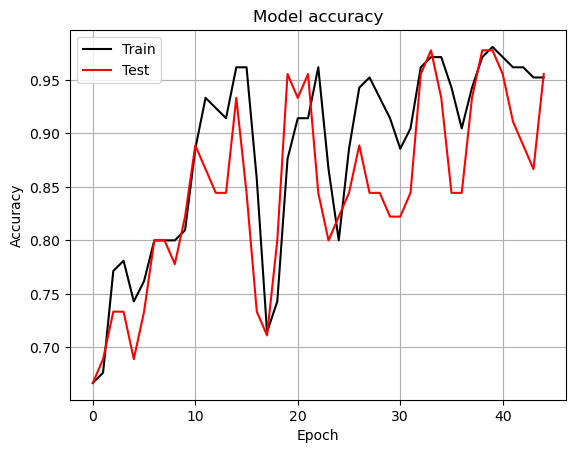

In [239]:
# plotting result
plt.plot(accuracy_history, 'k-')
plt.plot(validation_accuracy, 'r-')
plt.title("Model accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

In [234]:
# final accuracy
print("final accuracy for predicting training data =>", accuracy_history[-1])
print("final accuracy for predicting validation data =>", validation_accuracy[-1])

final accuracy for predicting training data => 0.9523809552192688
final accuracy for predicting validation data => 0.9555555582046509
